<a href="https://colab.research.google.com/github/MohamedElsayed002/DeepLearning_Study/blob/master/DeepLearningKeras3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [ ]:
#Setup
import warnings
import skillsnetwork

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Import keras objects for Deep Learning

from keras.models import Sequential
from keras.layers import Input , Dense , Flatten , Dropout , BatchNormalization
from keras.optimizers import Adam , SGD , RMSprop


In [ ]:
## Load in the data set
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv", overwrite=True)

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('./diabetes.csv', names=names, header=0)

Saved to '.'


In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
97,1,71,48,18,76,20.4,0.323,22,0
343,5,122,86,0,0,34.7,0.290,33,0
750,4,136,70,0,0,31.2,1.182,22,1
704,4,110,76,20,100,28.4,0.118,27,0
14,5,166,72,19,175,25.8,0.587,51,1


In [ ]:
X = diabetes_df.iloc[:,:-1].values
y = diabetes_df['has_diabetes'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y),np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [ ]:
# Above we see that about 35% of the patients in this dataset have diabetes,
# while 65% do not. This means we can get an accuracy of 65% without any model
# just declare that no one has diabetes. we will calculate the ROC-AUC score to
# evaluate performance of our model and also look at the accuracy as well to see if
# we imporved upon the 65% accuracy

In [ ]:
# Exercise 1: Get a baseline performance using Random Forest
# To begin, and get a baseline for classifier performance:

# Train a Random Forest model with 200 trees on the training data.
# Calculate the accuracy and roc_auc_score of the predictions.

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_log_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
# print(roc_auc_score(y_test,y_pred_prob_rf))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf)))

accuracy is 0.776


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')
### END SOLUTION

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
# Build a single hidden layer neural network

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape=(8,),activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Comprehension question:
# Why do we have 121 parameters? Does that make sense?
# Let's fit our model for 200 epochs

model_1.compile(SGD(lr = .003),"binary_crossentropy",metrics=['accuracy'])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)



Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.8230 - accuracy: 0.3351 - val_loss: 0.7844 - val_accuracy: 0.3698
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7679 - accuracy: 0.3490 - val_loss: 0.7401 - val_accuracy: 0.3646
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.3802 - val_loss: 0.7088 - val_accuracy: 0.4167
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5156 - val_loss: 0.6865 - val_accuracy: 0.5365
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5729 - val_loss: 0.6705 - val_accuracy: 0.6302
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6667 - accuracy: 0.6267 - val_loss: 0.6588 - val_accuracy: 0.6719
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6562 - val_loss: 0.6501 - val_accuracy: 0.6927
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# y_pred_class_nn_1[:10]

In [ ]:
# Print model performance and plot the roc curve
# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

# plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

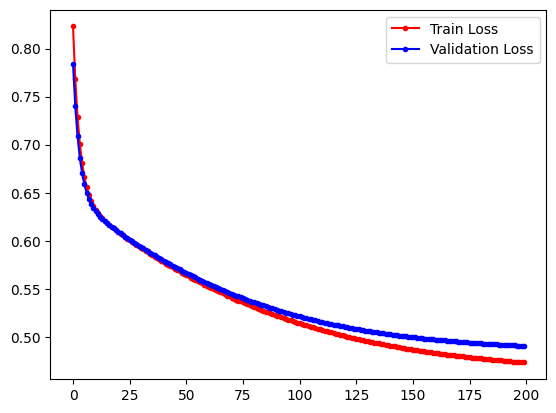

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Looks like the losses are still going down on both the training set and validation set. this suggests that the model might benefit from fruther
# training. let's train the model a little more and see what happens. note that it will pick up from where it left off. train for 1000 more epochs

run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4733 - accuracy: 0.7778 - val_loss: 0.4906 - val_accuracy: 0.7604
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.7778 - val_loss: 0.4905 - val_accuracy: 0.7604
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.7795 - val_loss: 0.4904 - val_accuracy: 0.7604
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7778 - val_loss: 0.4903 - val_accuracy: 0.7604
Epoch 5/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4725 - accuracy: 0.7795 - val_loss: 0.4902 - val_accuracy: 0.7656
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4723 - accuracy: 0.7778 - val_loss: 0.4901 - val_accuracy: 0.7656
Epoch 7/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.7795 - val_loss: 0.4900 - val_accuracy: 0.7708
Epoch 

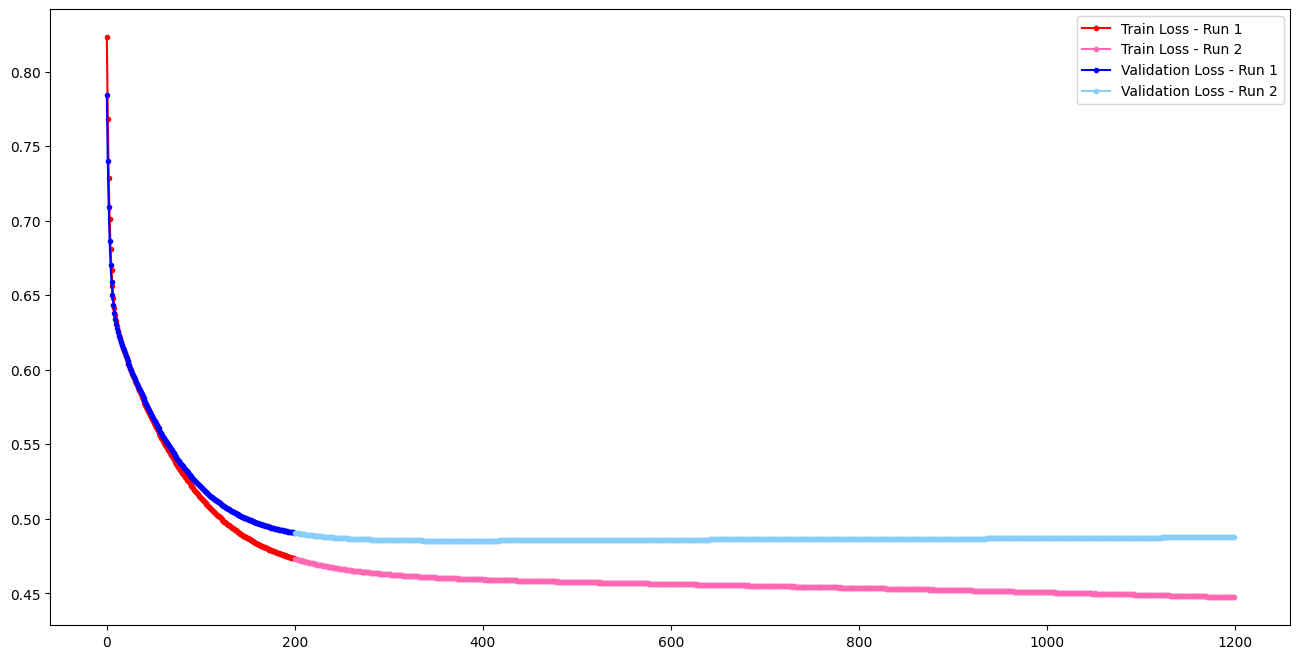

In [ ]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

In [ ]:
# Exercise 2
# For this exercise do the following in the cells below

# Build a model with two hidden layers, each with 6 nodes
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
# use a learning rate of .003 and train for 1500 epochs
# graph the trajectory of the loss functions accracy on both train and test set
# Plot the roc curve for the predictions

# Begin Solution
model_2 = Sequential()
model_2.add(Dense(6,input_shape=(8,),activation='relu'))
model_2.add(Dense(6, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(SGD(lr = .003),"binary_crossentropy",metrics=['accuracy'])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 2s 48ms/step - loss: 0.6975 - accuracy: 0.4236 - val_loss: 0.6917 - val_accuracy: 0.4948
Epoch 2/1500
18/18 [==============================] - 0s 13ms/step - loss: 0.6920 - accuracy: 0.5417 - val_loss: 0.6869 - val_accuracy: 0.5417
Epoch 3/1500
18/18 [==============================] - 0s 16ms/step - loss: 0.6871 - accuracy: 0.6181 - val_loss: 0.6826 - val_accuracy: 0.6302
Epoch 4/1500
18/18 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.6458 - val_loss: 0.6787 - val_accuracy: 0.6510
Epoch 5/1500
18/18 [==============================] - 0s 18ms/step - loss: 0.6785 - accuracy: 0.6580 - val_loss: 0.6751 - val_accuracy: 0.6562
Epoch 6/1500
18/18 [==============================] - 0s 11ms/step - loss: 0.6748 - accuracy: 0.6667 - val_loss: 0.6719 - val_accuracy: 0.6771
Epoch 7/1500
18/18 [==============================] - 0s 12ms/step - loss: 0.6715 - accuracy: 0.6701 - val_loss: 0.6689 - val_accuracy: 0.6667

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

ValueError: x and y must have same first dimension, but have shapes (200,) and (1500,)

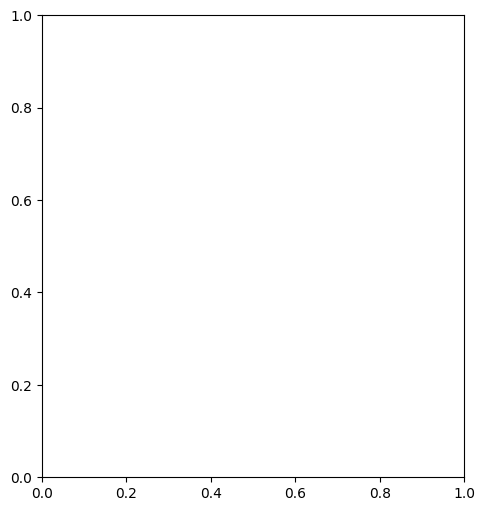

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["acc"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_acc"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [ ]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
### END SOLUTION

AttributeError: 'Sequential' object has no attribute 'predict_classes'